<a href="https://colab.research.google.com/github/varun1414/youtube_class/blob/master/classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [51]:
from fastai import *
from fastai.text import *

In [ ]:
import pandas as pd


In [ ]:
df=pd.read_csv('./sample_data/Youtube Video Dataset.csv')
df

,Title,Videourl,Category,Description
0,Madagascar Street Food!!! Super RARE Malagasy ...,/watch?v=EwBA1fOQ96c,Food,🎥GIANT ALIEN SNAIL IN JAPAN! » https://youtu.b...
1,42 Foods You Need To Eat Before You Die,/watch?v=0SPwwpruGIA,Food,This is the ultimate must-try food bucket list...
2,Gordon Ramsay’s Top 5 Indian Dishes,/watch?v=upfu5nQB2ks,Food,We found 5 of the best and most interesting In...
3,How To Use Chopsticks - In About A Minute 🍜,/watch?v=xFRzzSF_6gk,Food,You're most likely sitting in a restaurant wit...
4,Trying Indian Food 1st Time!,/watch?v=K79bXtaRwcM,Food,HELP SUPPORT SINSTV!! Shop Our Sponsors!\nLast...
...,...,...,...,...
11206,"art journal | shimmer sprays, stencils, collag...",/watch?v=mJBOQr_-8_Y,Art&Music,Step by step video on creating an art journal ...
11207,Ar-Tea Collage * Mixed Media Art,/watch?v=GOihUhnZxtw,Art&Music,"By: Ilene McInnes,\nMixed media Art and inspir..."
11208,DIY Mixed Media Art Collage Greeting Cards / M...,/watch?v=BchUtLfjews,Art&Music,Make your own Mixed Media Greeting Cards\n\nHe...
11209,Art Collage Process DecoJournal using Rice Pap...,/watch?v=FlQ_j-cflQc,Art&Music,Art Collage Process DecoJournal using Rice Pap...


In [ ]:
df['Category'].unique()

array(['Food', 'manufacturing', 'History', 'travel blog',
       'Science&Technology', 'Art&Music'], dtype=object)

In [145]:
df['labels']=df['Category']
# df['labels']=df[df['Category']=='manufacturing']=1
df['labels'][df['labels']=='Food']=0
df['labels'][df['labels']=='manufacturing']=1
df['labels'][df['labels']=='History']=2
df['labels'][df['labels']=='travel blog']=3
df['labels'][df['labels']=='Science&Technology']=4
df['labels'][df['labels']=='Art&Music']=5
df

,Title,Videourl,Category,Description,labels
0,Madagascar Street Food!!! Super RARE Malagasy ...,/watch?v=EwBA1fOQ96c,Food,🎥GIANT ALIEN SNAIL IN JAPAN! » https://youtu.b...,0
1,42 Foods You Need To Eat Before You Die,/watch?v=0SPwwpruGIA,Food,This is the ultimate must-try food bucket list...,0
2,Gordon Ramsay’s Top 5 Indian Dishes,/watch?v=upfu5nQB2ks,Food,We found 5 of the best and most interesting In...,0
3,How To Use Chopsticks - In About A Minute 🍜,/watch?v=xFRzzSF_6gk,Food,You're most likely sitting in a restaurant wit...,0
4,Trying Indian Food 1st Time!,/watch?v=K79bXtaRwcM,Food,HELP SUPPORT SINSTV!! Shop Our Sponsors!\nLast...,0
...,...,...,...,...,...
11206,"art journal | shimmer sprays, stencils, collag...",/watch?v=mJBOQr_-8_Y,Art&Music,Step by step video on creating an art journal ...,5
11207,Ar-Tea Collage * Mixed Media Art,/watch?v=GOihUhnZxtw,Art&Music,"By: Ilene McInnes,\nMixed media Art and inspir...",5
11208,DIY Mixed Media Art Collage Greeting Cards / M...,/watch?v=BchUtLfjews,Art&Music,Make your own Mixed Media Greeting Cards\n\nHe...,5
11209,Art Collage Process DecoJournal using Rice Pap...,/watch?v=FlQ_j-cflQc,Art&Music,Art Collage Process DecoJournal using Rice Pap...,5


In [166]:
df['Title']

0        Madagascar Street Food!!! Super RARE Malagasy ...
1                  42 Foods You Need To Eat Before You Die
2                      Gordon Ramsay’s Top 5 Indian Dishes
3              How To Use Chopsticks - In About A Minute 🍜
4                             Trying Indian Food 1st Time!
                               ...                        
11206    art journal | shimmer sprays, stencils, collag...
11207                     Ar-Tea Collage * Mixed Media Art
11208    DIY Mixed Media Art Collage Greeting Cards / M...
11209    Art Collage Process DecoJournal using Rice Pap...
11210    Journal Collage Process using Magazine Cut Out...
Name: Title, Length: 11211, dtype: object

In [167]:
df = df.sample(frac=1).reset_index(drop=True)

df_tr=pd.DataFrame({'text':df['Title'][0:9000],'labels':df['labels'][0:9000]})
df_tr
df_v=pd.DataFrame({"text":df['Title'][9000:],'labels':df['labels'][9000:]})
df_v.reset_index(inplace=True,drop=True)
df_v

,text,labels
0,"Furious World Tour | Vancouver, Canada - MASSI...",0
1,My Full Expense Video of Malaysia and Singapor...,3
2,1,1
3,Men vs. Women: Who Really Gets Sicker?,4
4,Art of You Art Collage,5
...,...,...
2206,"രുചിയുടെ കലവറ തേടി Oryx Village Kanhangad, Exp...",3
2207,Top 10 YouTube Travellers,3
2208,Hanging out at a Korean Cafe and Travel Bloggi...,3
2209,6 Northeastern Chinese Dishes You NEED to Try!,0


In [168]:
data_lm = TextLMDataBunch.from_df('./',train_df=df_tr,valid_df=df_v,text_cols='text')

In [169]:
data_lm.show_batch()

idx,text
0,xxmaj tom xxmaj xxunk - xxmaj science and xxmaj technology : xxmaj new xxmaj frontiers for xxmaj helping xxmaj people with xxmaj mental xxmaj illness . xxbos xxmaj xxunk xxmaj xxunk - xxmaj xxunk to xxmaj be ( feat . xxmaj florida xxmaj georgia xxmaj line ) [ xxmaj official xxmaj music xxmaj video ] xxbos xxunk xxunk xxunk xxbos xxmaj how xxmaj to xxmaj plan a xxmaj trip to
1,edition - xxmaj book xxmaj review xxbos xxup learn xxup how xxup to xxup do xxup collage xxup flower xxup visual xxup art xxup attack xxup must xxup watch xxbos | xxmaj road trip | xxup xxunk xxmaj video xxmaj blog | xxbos xxmaj snapchat xxmaj travel xxmaj blogger takeover in xxmaj new xxmaj xxunk - xxunk xxbos विज्ञान के xxunk xxunk 2 | xxmaj crazy science technology | xxmaj
2,japanese xxmaj xxunk xxmaj kept xxmaj their xxmaj blood xxmaj pure | xxmaj history of xxmaj japan 29 xxbos a xxmaj different xxmaj side of xxmaj dubai - xxmaj xxunk ( xxmaj local xxmaj markets ) xxbos xxmaj career choices with a xxmaj culinary xxmaj arts degree xxbos xxmaj the incredible history of xxmaj china 's xxunk warriors - xxmaj megan xxmaj campisi and xxmaj pen - xxmaj pen xxmaj
3,"1 xxbos xxmaj toy xxmaj smartphone coloring and drawing , xxmaj painting colours & xxmaj learn xxmaj colors for kids | xxmaj kids xxmaj art xxmaj time xxbos xxmaj art meaning in xxmaj urdu | xxup art in xxmaj hindi | xxmaj english xxunk xxunk into xxmaj urdu xxbos 1 xxbos xxmaj op xxmaj art xxmaj collage xxmaj project xxbos xxmaj ted xxmaj talks xxmaj india | नई xxunk |"
4,xxmaj how xxmaj to xxmaj live xxmaj to 100 xxbos xxmaj transforming xxmaj myself xxmaj into xxmaj my xxmaj dog xxbos 1 xxbos xxmaj luke xxmaj nguyen 's street food around the world episode 1- saigon vietnam xxbos 1 xxbos xxup brunch at xxup 7-eleven in xxmaj seoul xxmaj south xxmaj korea xxbos 1 xxbos xxmaj xxunk xxmaj xxunk | xxmaj come xxunk un travel blogger di xxunk xxbos xxmaj


In [170]:
data = TextClasDataBunch.from_df('./', train_df=df_tr,valid_df=df_v,text_cols='text',label_cols='labels')
data.show_batch()

text,target
xxbos xxmaj we 're xxmaj going to xxup sri xxup lanka ! ! ! xxup so xxup xxunk ! ! ! + xxup huge xxup bowl xxmaj chinese xxmaj street xxmaj food xxmaj dan xxmaj dan xxmaj noodle in xxmaj chengdu !,0
"xxbos xxup huge xxmaj street xxmaj food xxmaj tour of xxmaj colombo , xxmaj sri xxmaj lanka - xxup insane xxup seafood + xxup curry w / xxup giant xxup god xxup level xxup mud xxup crabs !",0
"xxbos xxup ancient xxup indian xxup history , xxup xxunk , [ xxup upsc / xxup ssc xxup cgl / xxup state xxup psc / xxup xxunk / xxup cds / xxup other xxup government xxup exams ]",2
xxbos xxmaj midnight xxmaj club xxup ii xxmaj xxunk xxup hd xxup eng / xxup xxunk part 4 - xxmaj paris vol . 1 - xxmaj blog xxmaj jewel & xxmaj julie xxmaj xxunk % xxmaj game ),3
"xxbos xxmaj family xxmaj travel xxmaj blog- xxmaj rock xxmaj spa xxmaj xxunk 's xxmaj all xxmaj xxunk xxmaj xxunk xxmaj kids ' xxmaj spa , xxmaj hard xxmaj rock xxmaj hotel xxmaj penang , xxmaj malaysia",3


In [171]:
data.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 '-']

In [172]:
data.train_ds[0][0]

Text [   2    5  610   13    5  335    5   64    0    6   64    6   25    6   39   10    5 2302    5 3085]

In [173]:
data.train_ds[0][0].data[:10]

array([  2,   5, 610,  13,   5, 335,   5,  64,   0,   6])

In [174]:
data_lm = (TextList.from_df(df,'.')
           #Inputs: all the text files in path
            
           #We may have other temp folders that contain text files so we only keep what's in train and test
            .split_by_rand_pct(0.1)
           #We randomly split and keep 10% (10,000 reviews) for validation
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch(bs=50))

In [175]:
data_lm.show_batch()

idx,text
0,for xxmaj helping xxmaj people with xxmaj mental xxmaj xxunk . xxbos xxmaj xxunk xxmaj xxunk - xxmaj xxunk to xxmaj be ( feat . xxmaj florida xxmaj georgia xxmaj line ) [ xxmaj official xxmaj music xxmaj video ] xxbos xxunk xxunk xxunk xxbos xxmaj how xxmaj to xxmaj plan a xxmaj trip to xxmaj goa xxmaj in xxmaj budget | xxmaj tips and xxmaj xxunk for xxmaj goa
1,"music education game xxup xxunk xxbos xxmaj street xxmaj food xxmaj around xxmaj the xxmaj world - xxmaj asian xxmaj street xxmaj food , xxmaj fast xxmaj food xxmaj street in xxmaj asia # xxunk xxbos xxmaj art and xxmaj music / xxup yoga and xxup meditation / 1 h 40 xxup tai xxup chi and relax music xxbos xxmaj get xxmaj xxunk ! xxmaj scientists xxmaj say xxmaj it"
2,xxmaj actually xxmaj bad xxmaj for xxmaj you ? xxbos 1 xxbos xxmaj realistic xxmaj portrait xxmaj painting xxmaj tutorial ( xxup brigitte ! ! ) xxmaj xxunk xxbos xxup vlog | xxmaj xxunk xxmaj dubai en xxunk xxunk xxbos xxmaj delhi to xxmaj manali || xxmaj best xxmaj route || xxmaj best xxmaj xxunk || xxmaj bus xxmaj xxunk xxmaj flight || xxunk xxbos xxmaj manali trip xxbos xxmaj
3,"xxmaj how xxmaj great xxmaj thou xxmaj art xxbos xxmaj manali , xxmaj himachal pradesh xxmaj full xxmaj tour | xxmaj vlog | xxmaj what to do ? & cheap xxmaj bengali hotel [ xxmaj eng xxup xxunk xxup xxunk ] xxbos xxmaj art xxmaj collage xxmaj process xxunk using xxmaj rice xxmaj paper and xxmaj magazine xxmaj cut xxmaj outs ♡ xxmaj maremi 's xxmaj small xxmaj art ♡"
4,": xxmaj history , xxmaj xxunk and xxmaj xxunk xxbos xxmaj amazing xxmaj hand xxmaj pulled xxmaj noodles in xxmaj china | xxmaj chinese xxmaj muslim xxmaj food xxbos xxup how i xxup travel xxup for xxup free xxup as a xxup travel xxup blogger | xxup xxunk xxup xxunk xxbos xxmaj is xxmaj your xxmaj sexual xxmaj fantasy xxmaj normal ? ( xxup xxunk ) xxbos xxmaj president 's"


In [188]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [177]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


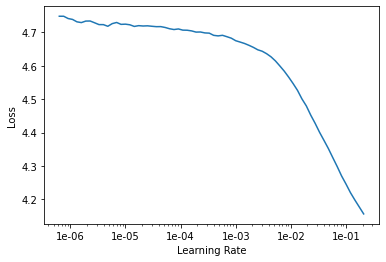

In [178]:
learn.recorder.plot(skip_end=20)

In [179]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.508022,3.008069,0.448429,00:15


In [183]:
learn.fit_one_cycle(10, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.758355,2.095502,0.247101,00:09
1,1.758442,1.899414,0.226583,00:09
2,1.757833,2.135464,0.288136,00:09
3,1.646793,2.713980,0.239964,00:10
4,1.706550,1.742574,0.349242,00:09
5,1.609485,1.322088,0.518287,00:10
6,1.625556,1.842827,0.432203,00:09
7,1.598972,1.518092,0.391615,00:09
8,1.608583,1.519263,0.485281,00:09
9,1.585658,1.572566,0.259590,00:09


In [189]:
TEXT = "Trip to"
N_WORDS = 40
N_SENTENCES = 2

In [190]:
print("\n".join(learn.predict(TEXT, N_WORDS,temperature=0.75) for _ in range(N_SENTENCES)))

Trip to Hell = = " The Bridge and the Channel " is a documentary by British Channel 4 . It was first made on 1 November 2008 , with the British
Trip to Mexico ( Mexican film ) = Off the West End is the first of Mexican films to be shot in Mexico in the United States . The film was shot


In [191]:
learn.save_encoder('fine_tuned_enc')

In [192]:
data_clas = (TextList.from_df(df,'.', vocab=data_lm.vocab)
             #grab all the text files in path
             .split_by_rand_pct(0.2)
             #split by train and valid folder (that only keeps 'train' and 'test' so no need to filter)
             .label_from_df(cols=4)
             #label them all with their folders
             .databunch(bs=50))

In [193]:
data_clas.show_batch()

text,target
xxbos xxmaj plan xxmaj your xxmaj goa xxmaj trip xxmaj under xxmaj xxunk / xxmaj visit xxmaj goa xxmaj at xxmaj very xxmaj cheap / xxmaj places xxmaj to xxmaj visit xxmaj in xxmaj goa / xxmaj travel xxmaj guide xxmaj in xxmaj goa,3
"xxbos xxup careers xxup in xxup ba xxup drawing & xxup painting – xxup ma , xxmaj paint , xxmaj artist , xxmaj animation xxmaj industry , xxmaj art xxmaj teacher , xxmaj art xxmaj schools , xxmaj jobs",5
xxbos xxmaj midnight xxmaj club xxup ii xxmaj xxunk xxup hd xxup eng / xxup xxunk part 4 - xxmaj paris vol . 1 - xxmaj blog xxmaj xxunk & xxmaj julie xxmaj xxunk % xxmaj game ),3
xxbos xxup daily xxup vlog xxup ep : 45 - xxup girl xxup ’s xxup day xxup out xxup with xxup xxunk xxup paris + xxup di xxup xxunk xxup xxunk xxup instagram || xxmaj xxunk xxmaj hunter,3
"xxbos xxmaj the xxup ultimate xxmaj chinese xxmaj noodle xxmaj tour - 5 xxup cities ! ! ! xxmaj beijing , xxmaj shanghai , xxmaj hong xxmaj kong , xxmaj chengdu + xxup more ! ! !",0


In [194]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (8969 items)
x: TextList
xxbos xxmaj weekend in xxmaj north xxmaj goa xxunk xxup goa xxup travel xxup vlog | xxmaj kritika xxmaj xxunk,xxbos 1,xxbos xxmaj common - xxmaj the xxmaj food,xxbos xxmaj wayanad xxmaj xxunk 2018 - xxunk xxunk 2018,xxbos xxmaj what xxmaj if xxmaj you xxmaj only xxmaj xxunk xxmaj soda ?
y: CategoryList
3,1,0,3,4
Path: .;

Valid: LabelList (2242 items)
x: TextList
xxbos xxmaj road xxmaj trip to xxmaj rajasthan with family , xxmaj mount xxmaj abu , xxmaj jodhpur , xxmaj jaipur , xxmaj chittorgarh , xxmaj udaipur,xxbos xxmaj should xxmaj we xxmaj xxunk xxmaj xxunk xxmaj for xxmaj science ?,xxbos xxmaj the xxmaj end xxmaj of xxmaj the xxmaj arctic,xxbos xxmaj scientists ' xxmaj crazy xxmaj plan xxmaj to xxmaj xxunk xxmaj the xxmaj arctic,xxbos xxmaj the xxunk xxunk is back - xxmaj acrylic pour painting for beginners
y: CategoryList
3,4,4,4,5
Path: .;

Test: None, model=SequentialRNN(
  (0): MultiBatchEncoder(
   

In [195]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


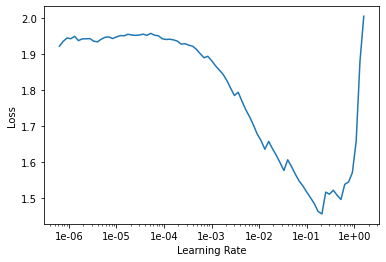

In [196]:
learn.recorder.plot()

In [201]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.710193,0.308855,0.901873,00:10


In [198]:
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.844588,0.355571,0.897859,00:09


In [202]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.459323,0.198852,0.939340,00:17
